# Goods Recommandation by the Tompson Sampling-based AI engine

## Declare Packages tu Use 

In [1]:
using Distributions
using Formatting
using Plots
using Zygote
using Random

## Parameter Initialization

In [2]:
function display(epoch::Int64, proposal_arm::Int64, probs::Vector{Float64}, disp::Bool=false)
    if disp
        println("Trial $(epoch)")
        for prob ∈ probs
            # println("prob: $(prob)")
            printfmt("prob: {:.2f} ", prob)
        end
        println(" => Max arm: $(proposal_arm)")
    end
end

function cost_ts(S, F)
    probs = rand.(Normal.(S, F.^2))
    proposal_arm = argmax(probs)
    p = rand(Uniform())
    if p < means[proposal_arm] 
        return (1 - probs[proposal_arm])^2
    else
        return (0 - probs[proposal_arm])^2
    end
end

cost_ts (generic function with 1 method)

## Training

In [3]:
N = 3
means = rand(N)
probs = zeros(N)

disp = false 
Nepoch = 1000
proposal_arm_array = zeros(Nepoch)
probs_array = zeros(Nepoch, N)
S = zeros(Float64, N)
F = ones(Float64, N)

S_list = zeros(Float64, Nepoch+1, N)
S_list[1,:] = S
F2_list = zeros(Float64, Nepoch+1, N)
F2_list[1,:] = F.^2

μ = 0.01
for epoch in range(1, Nepoch)
    G_all = gradient(cost_ts, S, F)
    S -= μ * G_all[1]
    F -= μ * G_all[2]    
    S_list[epoch+1,:] = S    
    F2_list[epoch+1,:] = F.^2
end

[0.3103764282778432, 0.5167664871584546, 0.885450467657254]


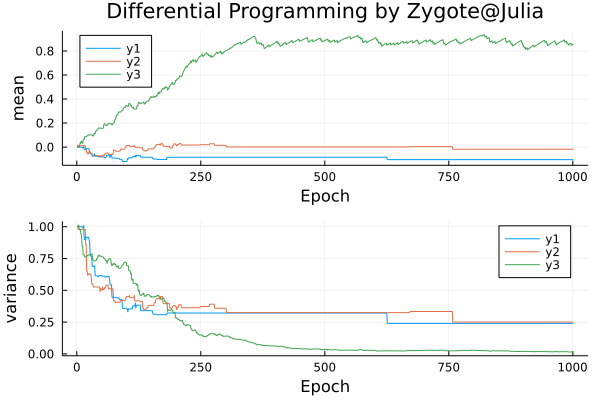

In [12]:
println(means)
p1 = plot(range(1,Nepoch+1), S_list, ylabel="mean", title = "Differential Programming by Zygote@Julia", legend=:topleft)
p2 = plot(range(1,Nepoch+1), F2_list, ylabel="variance")
plot(p1, p2, xlabel="Epoch", layout = (2,1))